In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from textblob import TextBlob
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import plot_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.manifold import TSNE
import time



# Load the data

In [2]:
year='../data/datasetsFinalaizedForEDA/datasets_top100-2017.csv'
df_new=pd.read_csv('../data/intermediate datasets-ToBeUsedForRanking/df_2017_new.csv')
new_dataframe_name="../data/intermediate datasets-ToBeUsedForRanking/df_2017_new.csv"


In [3]:
def load(year):
    df=pd.read_csv(year)
    return df

#df_2019=pd.read_csv('../data/datasets_top50-2019.csv',encoding='latin-1')


In [4]:
load(year)

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.9310,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.8130,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.8460,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.4460,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.8110,80.924,288600.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1PSBzsahR2AKwLJgx8ehB,Bad Things (with Camila Cabello),Machine Gun Kelly,0.675,0.690,2.0,-4.761,1.0,0.1320,0.2100,0.000000,0.2870,0.2720,137.817,239293.0,4.0
96,0QsvXIfqM0zZoerQfsI9l,Don't Let Me Down,The Chainsmokers,0.542,0.859,11.0,-5.651,1.0,0.1970,0.1600,0.004660,0.1370,0.4030,159.797,208053.0,4.0
97,7mldq42yDuxiUNn08nvzH,Body Like A Back Road,Sam Hunt,0.731,0.469,5.0,-7.226,1.0,0.0326,0.4630,0.000001,0.1030,0.6310,98.963,165387.0,4.0
98,7i2DJ88J7jQ8K7zqFX2fW,Now Or Never,Halsey,0.658,0.588,6.0,-4.902,0.0,0.0367,0.1050,0.000001,0.1250,0.4340,110.075,214802.0,4.0


In [5]:
df=load(year)

# data properties

In [6]:
def data_properties(year):
    print("properties for year are as follows :\n")
    print("column details:\n")
    print(year.columns)
    print("shape:\n")
    print(year.shape)
    print("info about dataset:\n")
    print(year.info())
    print("\n")


In [7]:
data_properties(df)

properties for year are as follows :

column details:

Index(['id', 'name', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')
shape:

(100, 16)
info about dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                100 non-null    object 
 1   name              100 non-null    object 
 2   artists           100 non-null    object 
 3   danceability      100 non-null    float64
 4   energy            100 non-null    float64
 5   key               100 non-null    float64
 6   loudness          100 non-null    float64
 7   mode              100 non-null    float64
 8   speechiness       100 non-null    float64
 9   acousticness      100 non-null    float64


### Initial calculations on data

#### checking if any value is null in the data 

In [8]:
def checkfornull(year):
    print("cheking for null values......")
    print(year.columns[year.isnull().any()])
    output=year.isnull().sum()
    return output 

In [9]:
checkfornull(df)

cheking for null values......
Index([], dtype='object')


id                  0
name                0
artists             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

#### convert the non float data to float data type

In [10]:
# in the data we obsrve that all the data is not in float .So , in order to maintain a symetry,we will 
# convert the non float data to float data type

def float_conversion(column,value):
    column= pd.to_numeric(value, downcast="float")
    return column


In [11]:
def execute_float_conversion():
    float_conversion(df.mode,df["mode"])
    float_conversion(df.duration_ms,df["duration_ms"])
    float_conversion(df.time_signature,df["time_signature"])
    return df.head()


In [12]:
execute_float_conversion()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


## Sequential column analysis

In [13]:
#Sequential column analysis: for in depth understanding 

In [14]:
def understand_feature(feature):
    return feature.describe()


#### danceability

In [15]:
#The higher the value, the easier it is to dance to this song.
def print_overall_dancebility_features():
    print("overall danceability feature\n")
    return understand_feature(df["danceability"])


In [16]:
print_overall_dancebility_features()

overall danceability feature



count    100.00000
mean       0.69682
std        0.12508
min        0.25800
25%        0.63500
50%        0.71400
75%        0.77025
max        0.92700
Name: danceability, dtype: float64

In [17]:
def top_10_dancebility():
    print("top 10  danceability feature\n")
    return understand_feature(df["danceability"].head(10))



In [18]:
top_10_dancebility()

top 10  danceability feature



count    10.000000
mean      0.726300
std       0.103301
min       0.609000
25%       0.645000
50%       0.710000
75%       0.802500
max       0.904000
Name: danceability, dtype: float64

In [19]:
#sorting out more danceble songs 
def sorting_dancebility():
    df['dancebility_new']=df['danceability']
    df.loc[df['danceability']>=0.6000,'dancebility_new']='1'
    df.loc[(df['danceability']<0.6000),'dancebility_new']='0'

    return (df['dancebility_new'].value_counts())

In [20]:
sorting_dancebility()

1    83
0    17
Name: dancebility_new, dtype: int64

In [21]:
print("top 10  energy  feature\n")
understand_feature(df["energy"].head(10))

top 10  energy  feature



count    10.00000
mean      0.64800
std       0.11705
min       0.45100
25%       0.57275
50%       0.64350
75%       0.74375
max       0.81500
Name: energy, dtype: float64

#### In Depth BPM

Understanding beats per minute i.e tempo of the song
here we do classification of the tempo on the bases of beats per min 
REf:https://www.musical-u.com/learn/rhythm-tips-for-identifying-music-genres-by-ear/

And creating a new feature :tempo_rate 
tempo_rate:This classifies the song on the basis of bpm like:
    - very slow
    - slow
    - moderate
    - fast
    - very fast


In [22]:
def tempo_rate():
    df['tempo_rate']=df['tempo']
    return df['tempo_rate']

In [23]:
tempo_rate()

0      95.977
1      88.931
2     177.833
3     103.019
4      80.924
       ...   
95    137.817
96    159.797
97     98.963
98    110.075
99    180.043
Name: tempo_rate, Length: 100, dtype: float64

In [24]:
def cateogarise_tempo_rate():
    df.loc[df['tempo']<65,'tempo_rate']='very slow'
    df.loc[(df['tempo']>=66) & (df['tempo']<=76),'tempo_rate']='slow'
    df.loc[(df['tempo']>=77) & (df['tempo']<=108),'tempo_rate']='moderate'
    df.loc[(df['tempo']>=109) & (df['tempo']<=168),'tempo_rate']='fast'
    df.loc[df['tempo']>168,'tempo_rate']='very fast'


In [25]:
cateogarise_tempo_rate()

In [26]:
def describe_songs_per_tempo_rate():
    print("Tempo Rate\tCount\n")
    print(df['tempo_rate'].value_counts())
    print("\n")
    df.head()

In [27]:
describe_songs_per_tempo_rate()

Tempo Rate	Count

moderate     46
fast         45
very fast     7
slow          2
Name: tempo_rate, dtype: int64




In [28]:
def barplot_temporate():
    sns.barplot(x=pd.DataFrame(df['tempo_rate'].value_counts()).tempo_rate, 
                y=pd.DataFrame(df['tempo_rate'].value_counts()).index
               )
    plt.title('music tempo', fontsize=17);

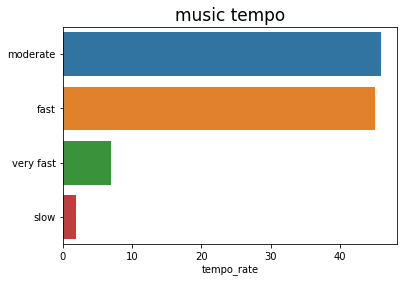

In [29]:
barplot_temporate()

sort the songs on the bases of important parametes like :

In [30]:
def sort_imp_parameters():
    return df[['name','artists','danceability','valence','tempo','tempo_rate','energy']].sort_values(by=["danceability","energy","valence"],ascending=False).head(10)

As we can see that these features collectively couldn't generate the sorted manner of artist as expected.We need to change our approach and include more features 


#### Analysing top artists
Analysing Top artists will give us a better idea about the feature importance 

In [31]:
#count the value:in terms on songs per year for an  artist
def songs_per_artist():
    print("Artist\t\tSongs\n")
    print(df["artists"].value_counts().head(20))

In [32]:
songs_per_artist()

Artist		Songs

The Chainsmokers    4
Ed Sheeran          4
Drake               3
Martin Garrix       3
Luis Fonsi          2
Imagine Dragons     2
Clean Bandit        2
Khalid              2
Bruno Mars          2
Post Malone         2
ZAYN                2
The Weeknd          2
Kendrick Lamar      2
Calvin Harris       2
DJ Khaled           2
Maroon 5            2
Shawn Mendes        1
Rita Ora            1
Julia Michaels      1
Steve Aoki          1
Name: artists, dtype: int64


#### Comparing  the  top artists based on our features 
lets start with top 5:

- Ed Sheeran          4
- The Chainsmokers    4
- Drake               3
- Martin Garrix       3
- Kendrick Lamar      2

In [33]:
def first():
    EdSheeran=df[df['artists']=='Ed Sheeran']
    print("Ed sheeran:")
    return EdSheeran[['name','danceability','energy','loudness','valence','tempo','tempo_rate']]

In [34]:
first()

Ed sheeran:


,name,danceability,energy,loudness,valence,tempo,tempo_rate
0,Shape of You,0.825,0.652,-3.183,0.931,95.977,moderate
17,Castle on the Hill,0.461,0.834,-4.868,0.471,135.007,fast
26,Galway Girl,0.624,0.876,-3.374,0.781,99.943,moderate
40,Perfect,0.599,0.448,-6.312,0.168,95.050,moderate


In [35]:
def second():
    TheChainsmokers=df[df['artists']=='The Chainsmokers']
    print("The Chainsmokers:")
    return TheChainsmokers[['name','danceability','energy','loudness','valence','tempo','tempo_rate']]

In [36]:
second()

The Chainsmokers:


,name,danceability,energy,loudness,valence,tempo,tempo_rate
3,Something Just Like This,0.617,0.635,-6.769,0.446,103.019,moderate
11,Paris,0.653,0.658,-6.428,0.219,99.990,moderate
28,Closer,0.748,0.524,-5.599,0.661,95.010,moderate
96,Don't Let Me Down,0.542,0.859,-5.651,0.403,159.797,fast


In [37]:
def third():
    Drake=df[df['artists']=='Drake']
    print("Drake:")
    return Drake[['name','danceability','energy','loudness','valence','tempo','tempo_rate']]

In [38]:
third()

Drake:


,name,danceability,energy,loudness,valence,tempo,tempo_rate
36,Passionfruit,0.809,0.463,-11.377,0.364,111.980,fast
51,Fake Love,0.927,0.488,-9.433,0.605,133.987,fast
54,One Dance,0.791,0.619,-5.886,0.371,103.989,moderate


In [39]:
def forth():
    MartinGarrix  =df[df['artists']=='Martin Garrix']
    print("Martin Garrix  :")
    return MartinGarrix  [['name','danceability','energy','loudness','valence','tempo','tempo_rate']]

In [40]:
forth()

Martin Garrix  :


,name,danceability,energy,loudness,valence,tempo,tempo_rate
27,Scared to Be Lonely,0.584,0.540,-7.786,0.195,137.972,fast
73,There for You,0.611,0.644,-7.607,0.130,105.969,moderate
86,In the Name of Love,0.490,0.485,-6.237,0.196,133.889,fast


In [41]:
def fifth():
    KendrickLamar   =df[df['artists']=='Kendrick Lamar']
    print("Kendrick Lamar   :")
    return KendrickLamar   [['name','danceability','energy','loudness','valence','tempo','tempo_rate']]

In [42]:
fifth()

Kendrick Lamar   :


,name,danceability,energy,loudness,valence,tempo,tempo_rate
5,HUMBLE.,0.904,0.611,-6.842,0.400,150.020,fast
60,DNA.,0.637,0.514,-6.763,0.402,139.931,fast


Here's the observation for the above  top 5 results:
- dancebility:Range:0.49-->0.90+
- energy:Range:0.48-->0.90+ , in general, the enegy in not very significant but  top songs have energy more than 0.48
- loudness:more -ve loudness means more popular the song is 
- valence:Range:Not a very important criteria
- tempo:Range:can not conclude about this, need more EDA
- tempo rate:Range: fast and moderate are in top



# EDA

in EDA approach we  try to  analyze data sets to summarize their main characteristics, often with visual methods  and  then Have a good understanding of data quality.. 
but to come to any conclusions and to decide weather A statistical model can be used we need to dig deeper into data

And so we did the best we could do with  EDA  for seeing what the data can tell us beyond the formal modeling or  any hypothesis testing task.

We did the a lot of  comparisions  amongst multiple features and here's a few of our results.


### PCA plot-large features


next to this our 3d modelling for detecting the outlier using the pca for our hypothetial top features.And  in the graph u can see  there a few ouliers songs which are not feature vice not closer to the other data  points.This gave us an idea about why perticulate songs are not fitting well.And this is an important thing to discuss to get more closer to assumption.


In [43]:
def plot_PCA_large():
    feture_to_plot = ["energy", "liveness", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness"]
    text1 = df["artists"] + " - " + df["name"]
    text2 = text1.values
    X = df[feture_to_plot].values
    y = df["danceability"].values
    min_maxscaler = MinMaxScaler()
    X = min_maxscaler.fit_transform(X)
    pca = PCA(n_components=3)
    pca.fit(X)
    X = pca.transform(X)

    plot3d = go.Scatter3d(
        x=X[:,0],
        y=X[:,1],
        z=X[:,2],
        text=text2,
        mode="markers",
        marker=dict(
            size=8,
            color=y
        )
    )

    fig = go.Figure(data=[plot3d])
    py.iplot(fig, filename="3d graph")


In [44]:
plot_PCA_large()

### Plot correlation matrix

In [45]:
def plot_correlation():
    correlation = df[['acousticness','danceability','energy','instrumentalness','liveness','tempo','valence',
                           'loudness']]
    plt.figure(figsize=(12,8))
    sns.heatmap(correlation.corr(), annot=True,cmap="coolwarm");

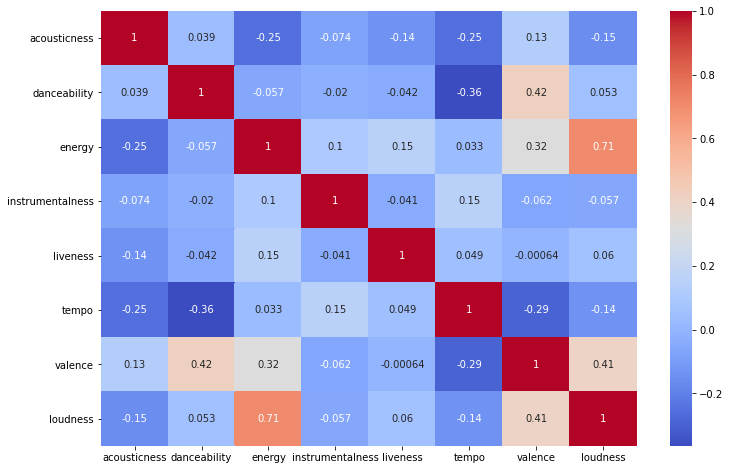

In [46]:
plot_correlation()

We can observe that there is a correlation between the loudness and the perceived energy of the song. The jointplots indicate a correlation between these two. Lets understand  how much one feature si impacted by another feature 

### Join plots

And for the features we again plotted a regression based joinplot. AS The multivariate normal distribution is a nice tool to demonstrate this type of plot and thus  it is sampling from a multidimensional Gaussian and there is natural clustering.
Here the line is  not close to flat because we chose our variables to be correlated.
So, in nutshell we had our eda as expected to be and it gave us the best features for a song to be at the top.

In [47]:
def create_joinplot(val1,val2,year,colr):
    sns.jointplot(val1,val2, data=year,kind='reg',color=colr)

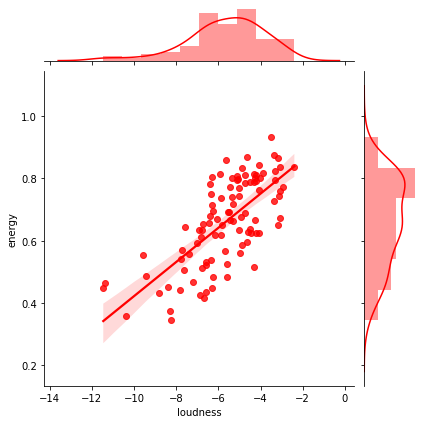

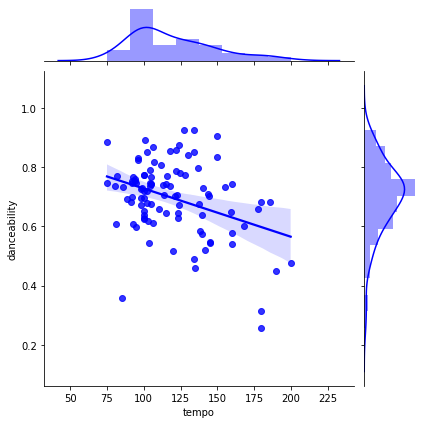

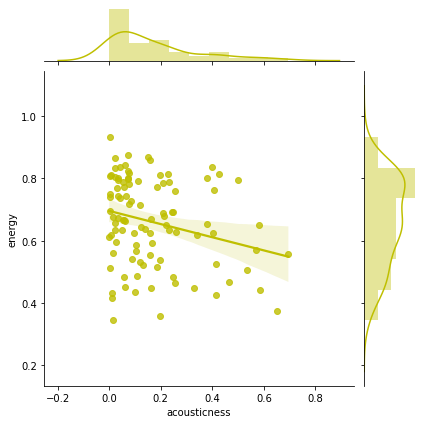

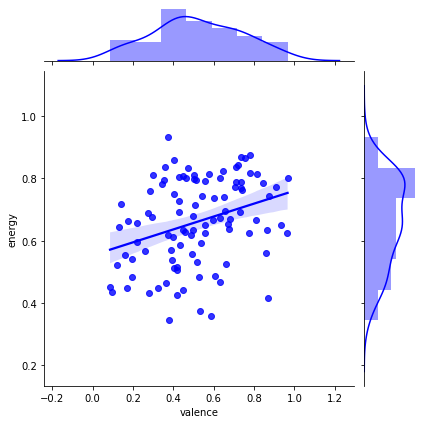

In [48]:

create_joinplot('loudness','energy',df,'r')
create_joinplot('tempo','danceability',df,'b')
create_joinplot('acousticness','energy',df,'y')
create_joinplot('valence','energy',df,'b')

from the corelation matrix we observe that  
- there is a relation between  tempo and dancebility 
- there is a relation between  acounsticeness and energy 
- there is a relation between  tempo and acousticeness
- there is a relation between  energy and loudness
- there is a relation between  tempo and valence
- there is a relation between  valence and dancebility 
- there is a relation between  valence and energy  

### dist plot for feature details 


In [49]:
def feature_details(feature):
    print("Mean value ", feature.mean())
    sns.distplot(feature,color="r")
    plt.show()


Mean value  0.6968199999999999


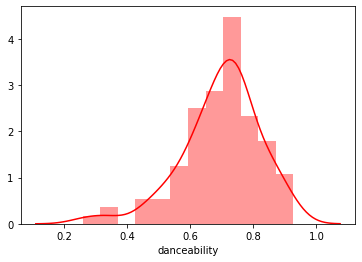

In [50]:
feature_details(df['danceability'])

*Conclusion*: top songs have high dancebility.And people listen to those songs in which they can dance.

Mean value  0.6606899999999999


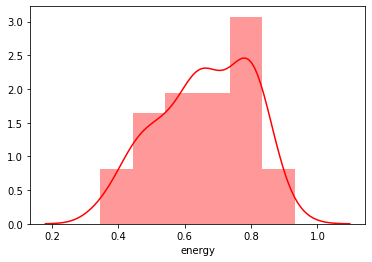

In [51]:
feature_details(df['energy'])

*Conclusion*:people like energetic songs 

Mean value  -5.6526499999999995


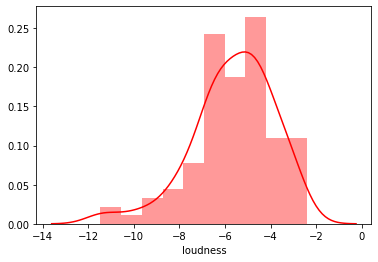

In [52]:
feature_details(df['loudness'])

*Conclusion*: more noice means more ranking 

Mean value  0.16630648999999997


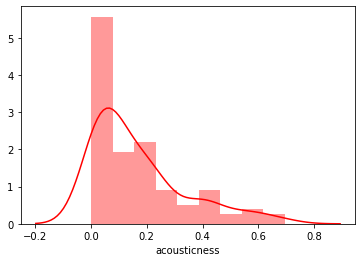

In [53]:
feature_details(df['acousticness'])

*Conclusion*:people don't lisen more to the acoustics 

Mean value  0.5170489999999999


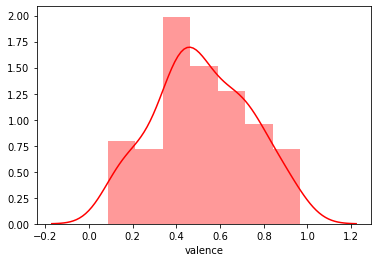

In [54]:
feature_details(df['valence'])

*Conclusion*:songs are evenly distributed and totally depends upon the mood 

Mean value  119.20246000000002


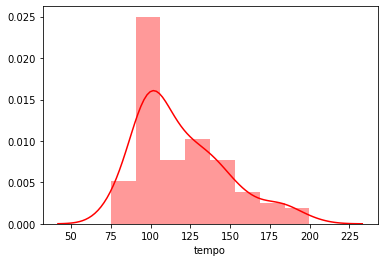

In [55]:
feature_details(df['tempo'])

*Conclusion*:people listen fast songs more 

In [56]:
# store mean values of above features
a=df['danceability'].mean()
b=df['energy'].mean()
c=df['loudness'].mean()
d=df['acousticness'].mean()
e=df['valence'].mean()
f=df['tempo'].mean()


### pca -important features 

In [57]:
def plot_pca_important_features():
    feture_to_plot = ["energy", "liveness", "tempo", "valence","danceability"]
    text1 = df["artists"] + " - " + df["name"]
    text2 = text1.values
    X = df[feture_to_plot].values
    y = df["danceability"].values
    min_maxscaler = MinMaxScaler()
    X = min_maxscaler.fit_transform(X)
    pca = PCA(n_components=3)
    pca.fit(X)
    X = pca.transform(X)

    plot3d = go.Scatter3d(
        x=X[:,0],
        y=X[:,1],
        z=X[:,2],
        text=text2,
        mode="markers",
        marker=dict(
            size=8,
            color=y
        )
    )

    fig = go.Figure(data=[plot3d])
    py.iplot(fig, filename="3d graph-2nd")


In [58]:
plot_pca_important_features()

 # Create a popularity column

So, now if u see we crearted a new feature a.ka popularity adn did our comuputation to device if popularity is 1 or 0 for a song.And for better outcomes we have a graph here in which you an see the distribution of data around meen .For popularity 0 the distribution is scattereed  but for popularity 1 cateogary we have the danceability data around mean and not scaterred too much.
Similarly we did comparisions for other featurees.

In [59]:

#dance ,valence , energy , liveliness

def popularity_binary():
    if  'popularity'  not in df.columns:
         df["popularity"]=""
         df.loc[(df['danceability']>=a) | (df['energy']>=b)| (df['loudness']>=c)| (df['acousticness']>=d)| 
                        (df['valence']>=e)| (df['tempo']>=f),'popularity']='1'
         df.loc[(df['danceability']<a) & (df['energy']<b) & (df['loudness']<c),'popularity']='0'
         df.head()

         df.to_csv(new_dataframe_name,index=False)
           
    else:
        pass
        

In [60]:
popularity_binary()

In [61]:
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,dancebility_new,tempo_rate,popularity
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0,1,moderate,1
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0,1,moderate,1
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0,1,very fast,1
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0,1,moderate,0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0,1,moderate,1


In [62]:
df_new=pd.read_csv('../data/intermediate datasets-ToBeUsedForRanking/df_2017_new.csv')


## correlation between features and popularity

In [63]:
def draw(year,compare_col,color):
    graph = sns.FacetGrid(df_new, col = "popularity")
    graph.map(sns.distplot, compare_col, bins = 25,color=color)
    return plt.show()

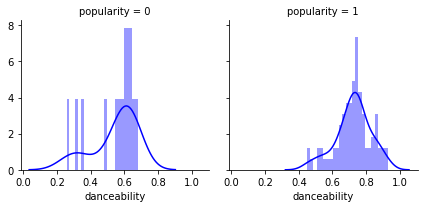

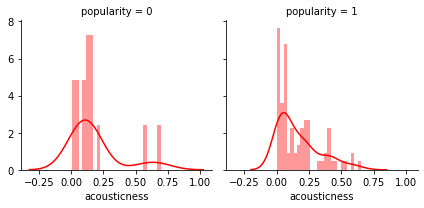

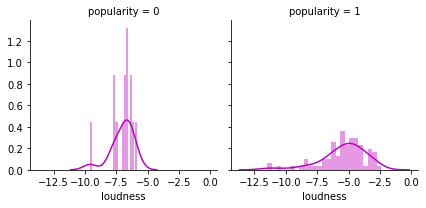

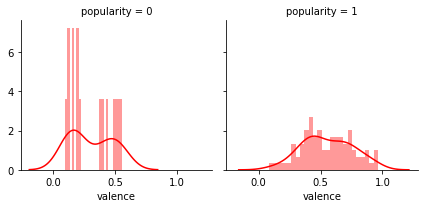

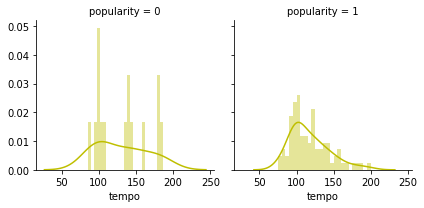

In [64]:
draw(df_new,"danceability","b")
draw(df_new,"acousticness","r")
draw(df_new,"loudness","m")
draw(df_new,"valence","r")
draw(df_new,"tempo","y")


In [65]:
def concat_name_popularity():
    popularity_data = pd.concat([df_new["name"],df_new["popularity"]],axis=1)
    return popularity_data.head()

In [66]:
concat_name_popularity()

,name,popularity
0,Shape of You,1
1,Despacito - Remix,1
2,Despacito (Featuring Daddy Yankee),1
3,Something Just Like This,0
4,I'm the One,1


# calculating scores

## data preparation 

In [67]:
df_final=df_new.copy()

In [68]:

def drop():
    
    df_final.drop(["id","name","artists","tempo_rate","dancebility_new"],axis=1,inplace=True)
    return df_final.columns


In [69]:
drop()

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'popularity'],
      dtype='object')

In [70]:
def cateogarize_keys():
    global df_final
    df_final["key"] = df_final["key"].astype("category")
    df_final = pd.get_dummies(df_final, columns=["key"])
    return df_final.head()


In [71]:
cateogarize_keys()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0
0,0.825,0.652,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,...,0,0,0,0,0,0,0,0,0,0
1,0.694,0.815,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,...,1,0,0,0,0,0,0,0,0,0
2,0.660,0.786,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,...,1,0,0,0,0,0,0,0,0,0
3,0.617,0.635,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,...,0,0,0,0,0,0,0,0,0,1
4,0.609,0.668,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,...,0,0,0,0,0,1,0,0,0,0


In [72]:
def cateogarize_time():
    global df_final
    df_final["time_signature"] = df_final["time_signature"].astype("category")
    df_final = pd.get_dummies(df_final, columns=["time_signature"])
    return df_final.head()

In [73]:
cateogarize_time()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,time_signature_3.0,time_signature_4.0
0,0.825,0.652,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,...,0,0,0,0,0,0,0,0,0,1
1,0.694,0.815,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,...,0,0,0,0,0,0,0,0,0,1
2,0.660,0.786,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,...,0,0,0,0,0,0,0,0,0,1
3,0.617,0.635,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,...,0,0,0,0,0,0,0,1,0,1
4,0.609,0.668,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,...,0,0,0,1,0,0,0,0,0,1


In [74]:
def change_datatype(var):
    df_final[var] = df_final[var].astype(int)
    
columns= ["key_0.0","key_1.0","key_2.0",
         "key_3.0","key_4.0","key_5.0","key_6.0","key_7.0","key_8.0","key_9.0","key_10.0","key_11.0","time_signature_3.0","time_signature_4.0"]
for column in columns:
    change_datatype(column)
    

In [75]:
def load_data():
    
    y = df_final["popularity"].values
    X = df_final.drop(["popularity"],axis=1)
    return X,y
X,y =load_data()

feature_cols = X.columns.to_list()

*NOTE*:There is not a great  linear correlations in our data So, Decision Tree algorithms will give  better results as compared to linear regression models. Therefore using  Random Forest 
 

In [76]:

#x_data=X
X,y = load_data()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.6)
# X_train = X_train.T
# X_test = X_test.T
X_train=X_train[:None]
X_test=X_test[:None]
y_train = y_train.astype(int).T
y_test = y_test.astype(int).T
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)


X_train:  (40, 25)
X_test:  (60, 25)
y_train:  (40,)
y_test:  (60,)


## xgb  top features -for validating  our  hypothesis

So after our popularity distributiona and 3d modelling based on pca.Now further we diecided to .Test if our hypothesis features as top ranking as per our eda  are similar
when compared to a very standard feature ranking algorithm like XGBoosting for feature engineering .And the outcome was we had our hypothesis prooved very accurate in terms of best features conributing for a song to  be in the top position. 

In [77]:
def plot_impfeature():
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    ax = plot_importance(xgb,color="r", height=0.15,
                         title='  Features Importance ', xlabel='Feature score', ylabel='Features',
                         importance_type='weight'
                        )

    return plt.show()




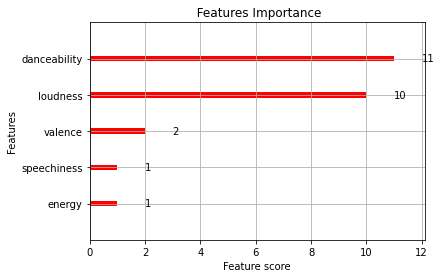

In [78]:
plot_impfeature()

##### The above graph assure that :
-  Our proposed ranked features turned out to be  most important for this data  
-  Example: we calculated features like :dancebility ,energy,loudness ets of most importance.And hence thus turned out true.

In [79]:
def calculate_scores():
    rf=RandomForestClassifier(random_state = 3)
    rf.fit(X_train,y_train)

    print("Train accuracy ",rf.score(X_train,y_train))
    print("Test accuracy ",rf.score(X_test,y_test))

    RandomForestClassifier_score=rf.score(X_test,y_test)
    y_pred=rf.predict(X_test)
    t_true=y_test

In [80]:
calculate_scores()

Train accuracy  1.0
Test accuracy  0.9166666666666666


# validating model 

## plot loudness t-SNE

In [81]:
def plot_pca_scaler(y,dataframe):
    features = ["energy", "liveness", "tempo", "valence", "loudness","danceability"]

    text1 = dataframe["artists"] + " - " + dataframe["name"]
    text2 = text1.values
    
    X = dataframe[features].values
    y = dataframe[y].values

    minmaxscaler = MinMaxScaler()
    X = minmaxscaler.fit_transform(X)

    print('t-SNE starting.................')
    tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(X)

    print('......................t-SNE done')

    fig = {
        "data": [
            {
                "x": tsne_results[:, 0],
                "y": tsne_results[:, 1],
                "text": text2,
                "mode": "markers",
                "marker": {"size": 8, "color": y}
            }
        ],
        "layout": {
            "xaxis": {"title": "x-tsne"},
            "yaxis": {"title": "y-tsne"}
        }
    }

    return py.iplot(fig, filename="amit")

In [82]:
plot_pca_scaler("loudness",df)

t-SNE starting.................
[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.335663
[t-SNE] KL divergence after 250 iterations with early exaggeration: 114.070480
[t-SNE] KL divergence after 300 iterations: 2.231181
......................t-SNE done


## project the 'top' and 'bottom' songs (or 'not-top' songs) 

project into the t-SNE space and see if they cluster differently.

1. separate the songs on the basis of popularity--> o and 1 , here 0  are the not top songs and 1 are top songs

- EXPECTED 1: Songs having popularity 1 should be tightly coupled  and 

- EXPECTED 2: Songs having popularity 0 should be loosely coupled  

In [83]:
def top_songs(dataframe):
    df1 = dataframe[dataframe['popularity'] == 1]
    return plot_pca_scaler("loudness",df1)

In [84]:
top_songs(df_new)

t-SNE starting.................
[t-SNE] Computing 84 nearest neighbors...
[t-SNE] Indexed 85 samples in 0.000s...
[t-SNE] Computed neighbors for 85 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 85 / 85
[t-SNE] Mean sigma: 0.369569
[t-SNE] KL divergence after 250 iterations with early exaggeration: 104.208015
[t-SNE] KL divergence after 300 iterations: 2.936863
......................t-SNE done


HENCE:assumption 1 prooved 

In [85]:
def not_top_songs(dataframe):
    df2 = dataframe[dataframe['popularity'] ==0 ]
    return plot_pca_scaler("loudness",df2)

In [86]:
not_top_songs(df_new)

t-SNE starting.................
[t-SNE] Computing 14 nearest neighbors...
[t-SNE] Indexed 15 samples in 0.000s...
[t-SNE] Computed neighbors for 15 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 15 / 15
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.356396
[t-SNE] KL divergence after 300 iterations: 2.087600
......................t-SNE done


HENCE:assumption 2 also prooved 